Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


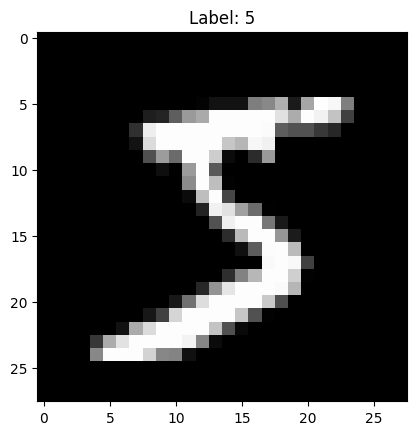

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.9015 - loss: 0.3321 - val_accuracy: 0.9752 - val_loss: 0.0826
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9825 - loss: 0.0589 - val_accuracy: 0.9806 - val_loss: 0.0661
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9826 - val_loss: 0.0585
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9930 - loss: 0.0216 - val_accuracy: 0.9857 - val_loss: 0.0487
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9958 - loss: 0.0134 - val_accuracy: 0.9831 - val_loss: 0.0599
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9810 - loss: 0.0671
Test Accuracy: 98.39%


In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train_cat, epochs=5, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc*100:.2f}%")

predictions = model.predict(X_test[:5])

for i in range(5):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} | Actual: {y_test[i]}")
    plt.show()

